# Google Search Analysis with Python

On average, 3.5 billion searches are made every day on Google, which translates to about 40,000 queries made every second. Therefore, using Google search to analyse data based on search queries is a perfect use case.

In [1]:
# Installing the reqiured package for the analytics 
!pip install pytrends

You should consider upgrading via the 'C:\Users\Tony\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
# Import required modlues to the python environment
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()

# Let’s create a DataFrame of the top 10 countries which search for “Machine Learning” on Google:

In [5]:
trends.build_payload(kw_list=["Machine Learning"])
data = trends.interest_by_region()
data = data.sort_values(by="Machine Learning", ascending=False)
data = data.head(10)
print(data)

             Machine Learning
geoName                      
China                     100
Singapore                  45
Ethiopia                   36
India                      33
St. Helena                 31
Hong Kong                  24
Pakistan                   23
South Korea                22
Tunisia                    20
Bangladesh                 20


### Information from the graph
According to the aforementioned findings, China is where "Machine learning"-related search searches are made most frequently.




#### Instead of the word 'Machine Learning' we can use any other word for finding the information. 

# We can also visualize this data using a bar chart:

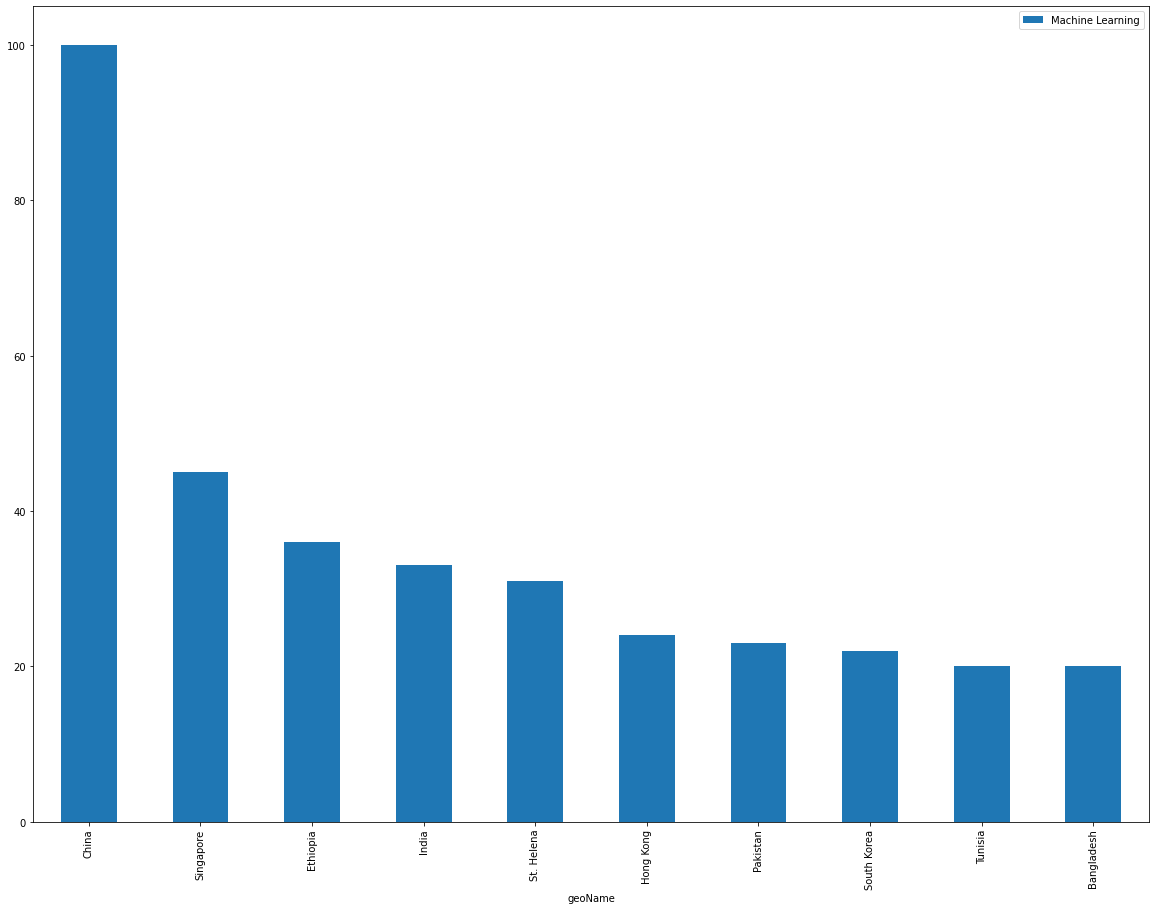

In [6]:
data.reset_index().plot(x="geoName", y="Machine Learning", 
                        figsize=(20,15), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

### Information from the graph
 The above information  in the form of table, we have converted into a bar chart in order to visualizer it easily.The information from the above and the table is same, however the bar chart make the presentation more easy.

# Let’s have a look at the trend of searches to see how the total search queries based on “Machine Learning” increased or decreased on Google:

In [9]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Machine Learning'])
data = data.interest_over_time()
data

,Machine Learning,isPartial
date,,
2017-08-13,40,False
2017-08-20,41,False
2017-08-27,41,False
2017-09-03,45,False
2017-09-10,46,False
...,...,...
2022-07-03,78,False
2022-07-10,75,False
2022-07-17,80,False


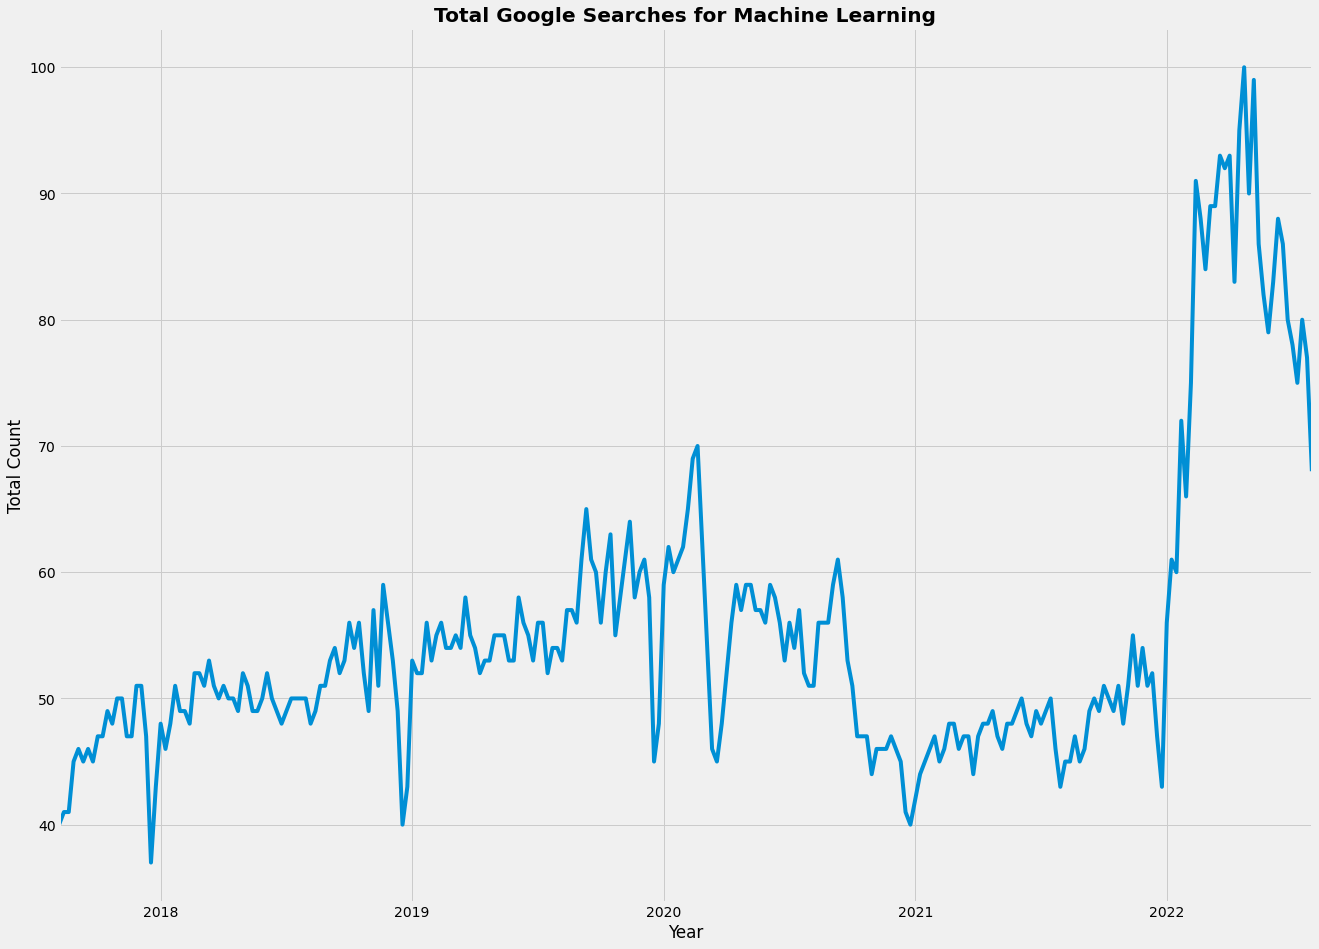

In [10]:
fig, ax = plt.subplots(figsize=(20, 15))
data['Machine Learning'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for Machine Learning', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

### Information from the graph

The graph above shows that searches for the term "machine learning" peaked after 2022.

# We have access to the most popular searches each year.

# For the year 2020

In [12]:
df = trends.top_charts(2020, hl='en-US', 
                                tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


### Information from the above table

We can see from the output above that "Coronavirus" will be the most searched keyword in 2020, followed by the others.

# For the year 2022

In [30]:
df = trends.top_charts(2021, hl='en-US', 
                                tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


### Information from the above table

We can see from the output above that "Australia vs India" will be the most searched keyword in 2020, followed by the others.

# Related Query
There is a good chance that a person who conducts a Google search for a specific topic will conduct more searches on that same topic. These are referred to as related searches. Let's look up a list of questions that are connected to "Machine Learning."

In [13]:
trends.build_payload(kw_list=['Machine Learning'])
related_queries = trends.related_queries()
related_queries.values()

dict_values([{'top':                               query  value
0             machine learning data    100
1           python machine learning     76
2                            python     76
3          what is machine learning     56
4                                ai     47
5               ai machine learning     47
6                     deep learning     41
7    machine learning deep learning     41
8           google machine learning     36
9            machine learning model     34
10             machine learning pdf     31
11      machine learning algorithms     28
12          machine learning course     28
13          artificial intelligence     27
14                     data science     27
15      machine learning regression     25
16                       regression     25
17       machine learning algorithm     24
18                        algorithm     23
19  classification machine learning     22
20                   classification     22
21                               

##### Above findings are a few of the Google searches for machine learning that are most popular.

# Trending Searches in each reagion

In [19]:
trending_US = trends.trending_searches(pn='united_states') # trending searches in real time for United States
trending_Canada = trends.trending_searches(pn='canada')

In [20]:
trending_US

,0
0,Man United vs Brighton
1,Teresa Giudice wedding
2,Everton vs Chelsea
3,Tottenham vs Southampton
4,PSG
5,Archie Battersbee
6,Liverpool
7,Khloe Kardashian
8,Demaryius Thomas died
9,Taron Egerton


### Information from the above table

"Man United vs Brighton" is the most search word in US

In [21]:
trending_Canada

,0
0,Man United vs Brighton
1,Britney Spears
2,BC Lions
3,Jamahal Hill
4,Leicester City vs Brentford
5,West Ham vs Man City
6,Geoff Neal
7,Sam Alvey
8,Heat warning
9,Fulham vs Liverpool


### Information from the above table


"Man United vs Brighton" is also the most search word in Canada

# Realtime Search Trends in regions

In [23]:
rtst_US = trends.realtime_trending_searches(pn='US') # realtime search trends for United States
rtst_US

,title,entityNames
0,"Atlético de Madrid, Juventus F.C., LaLiga, Álv...","[Atlético de Madrid, Juventus F.C., LaLiga, Ál..."
1,"Manchester United F.C., Eric Bailly, A.S. Roma...","[Manchester United F.C., Eric Bailly, A.S. Rom..."
2,"Maxwel Cornet, West Ham United F.C., Burnley F...","[Maxwel Cornet, West Ham United F.C., Burnley ..."
3,"Manchester United F.C., Leroy Sané, Manchester...","[Manchester United F.C., Leroy Sané, Mancheste..."
4,"India women's national cricket team, Alyssa He...","[India women's national cricket team, Alyssa H..."
...,...,...
95,"Bangladesh national cricket team, One Day Inte...","[Bangladesh national cricket team, One Day Int..."
96,"Miami Dolphins, Mike McDaniel, John Albert Elw...","[Miami Dolphins, Mike McDaniel, John Albert El..."
97,"Montreal, Montréal Pride, Media","[Montreal, Montréal Pride, Media]"
98,"United States Marine Corps, Four-star rank, Ge...","[United States Marine Corps, Four-star rank, G..."


In [28]:
rtst_Mexico = trends.realtime_trending_searches(pn='MX') # realtime search trends for Mexico
rtst_Mexico

,title,entityNames
0,"Spotify Camp Nou, FC Barcelona, Club Universid...","[Spotify Camp Nou, FC Barcelona, Club Universi..."
1,"FC Barcelona, Miralem Pjanić, Xavi","[FC Barcelona, Miralem Pjanić, Xavi]"
2,"Manchester City F.C., Premier League, West Ham...","[Manchester City F.C., Premier League, West Ha..."
3,"Manchester United F.C., Real Madrid CF, Manche...","[Manchester United F.C., Real Madrid CF, Manch..."
4,"Juan Dinenno, Club Universidad Nacional, Al-Sh...","[Juan Dinenno, Club Universidad Nacional, Al-S..."
...,...,...
120,"Andrés García, Rafael Inclán, Sharks","[Andrés García, Rafael Inclán, Sharks]"
121,"State Attorney General of Spain, offense repor...","[State Attorney General of Spain, offense repo..."
122,"Baltimore Orioles, Pittsburgh Pirates, America...","[Baltimore Orioles, Pittsburgh Pirates, Americ..."
123,"Dog, Sharks","[Dog, Sharks]"


# Keyword Suggestions

The suggestions() method will assist you in learning what people are looking for. It provides a list of extra suggested terms that can be used to narrow down a Google trending search.

In [14]:
keywords = trends.suggestions(
  keyword='Machine Learning')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid') 

,title,type
0,Machine learning,Field of study
1,Automated machine learning,Topic
2,Ensemble learning,Topic
3,Journal of Machine Learning Research,Peer-reviewed journal
4,Online machine learning,Topic


In [32]:
keyword='Machine Learning'
results=trends.suggestions(keyword)
print("First suggestion: '{}'" .format(results[0]['title']))

First suggestion: 'Machine learning'


# Categories

Returns a dictionary of categories so you can use it to get the id necessary for the "cat=" argument

In [33]:
cat_dict = trends.categories()
print("First level: {} Id: {}".format(cat_dict['name'],cat_dict['id']))
print("Second level: {} Id: {}".format(cat_dict['children'][0]['name'],cat_dict['children'][0]['id']))
print("Third level: {} Id: {}".format(cat_dict['children'][0]['children'][0]['name'],cat_dict['children'][0]['children'][0]['id']))
print("")

First level: All categories Id: 0
Second level: Arts & Entertainment Id: 3
Third level: Celebrities & Entertainment News Id: 184



### Conclusion

Thus, it is clear that "machine learning"-related searches on Google began to rise in 2017 and peaked in 2022 and continue to do so today. This is how any keyword-based Google search analysis is done. To learn what users are searching for on Google at any particular time, a business can conduct Google search analysis.

# Reference

https://pypi.org/project/pytrends/